In [36]:
# For Data reading 
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# For Feature Scaling & Feature Importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesRegressor

# For model building & scoreing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# from sklearn.metrics import accuracy_score


# others
import warnings
warnings.filterwarnings('ignore')

In [37]:
# for showing all columns & rows
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [38]:
train_df = pd.read_csv(r"https://drive.google.com/uc?export=download&id=1-2fIjH4CxFxf4Q3je62Kqxofp89DLl4N")
test_df = pd.read_csv(r"https://drive.google.com/uc?export=download&id=1bR0WcWp9rYSeqnU17nkWs_yFRsNxPU1J")
train_dict = pd.read_csv(r"https://drive.google.com/uc?export=download&id=15qfW-ZHLoceEkf97aJ2haYFt1JBTVqpq")

### Handle Missing value of features 

In [32]:
# Let's check missing values
print('Train Dataset:::::::::::::::')
print(train_df.isnull().sum())
print("=========================================")
print('Test Dataset::::::::::::::::')
print(test_df.isnull().sum())

Train Dataset:::::::::::::::
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64
Test Dataset::::::::::::::::
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness             

In [4]:
# Find features of missing values 
def NaNFeature(df):
    nan_feature = [n for n in df.columns if df[n].isnull().sum()>=1]
    return nan_feature

In [5]:
# Let's fill missing values of train detaset 
nan_features_train = NaNFeature(train_df)
for fillnan in nan_features_train:
    train_df[fillnan].fillna(train_df[fillnan].mode()[0], inplace=True)

In [6]:
# Let's fill missing values of test detaset 
nan_features_test = NaNFeature(test_df)
for fillnan in nan_features_test:
    test_df[fillnan].fillna(test_df[fillnan].mode()[0], inplace=True)

In [31]:
# Lets check missing values percentage
print('Train Dataset:::::::::::::::')
print(np.round(train_df.isnull().sum() * 100 / len(train_df), 4))
print("=========================================")
print('Test Dataset:::::::::::::::')
print(np.round(test_df.isnull().sum() * 100 / len(test_df), 4))

Train Dataset:::::::::::::::
City_Code_Hospital                   0.0
Hospital_region_code                 0.0
Available Extra Rooms in Hospital    0.0
Department                           0.0
Ward_Type                            0.0
Ward_Facility_Code                   0.0
Bed Grade                            0.0
City_Code_Patient                    0.0
Type of Admission                    0.0
Severity of Illness                  0.0
Visitors with Patient                0.0
Age                                  0.0
Admission_Deposit                    0.0
Stay                                 0.0
dtype: float64
Test Dataset:::::::::::::::
City_Code_Hospital                   0.0
Hospital_region_code                 0.0
Available Extra Rooms in Hospital    0.0
Department                           0.0
Ward_Type                            0.0
Ward_Facility_Code                   0.0
Bed Grade                            0.0
City_Code_Patient                    0.0
Type of Admission         

### Handle categorical features 

In [8]:
# Let's Find out categorical features through a function
def CatFeatures(df):
    features = [feature for feature in df.columns if df[feature].dtypes == "O"]
    return features

In [9]:
# categorical features of train dataset
cat_features_train = CatFeatures(train_df)
cat_features_train

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age',
 'Stay']

In [ ]:
# ?Let's check unique value of categorical features of train data
for i in cat_features_train:
    print(train_df[i].unique())

In [10]:
# categorical features of test dataset
cat_features_test = CatFeatures(test_df)
cat_features_test

['Hospital_type_code',
 'Hospital_region_code',
 'Department',
 'Ward_Type',
 'Ward_Facility_Code',
 'Type of Admission',
 'Severity of Illness',
 'Age']

In [ ]:
for i in cat_features_test:
    print(test_df[i].unique())

In [11]:
# # Let's create a function to handle categorical features 
def CatToNumaric():
    # Handle categorical feature of train dataset
    for n in cat_features_train:
        num_data = dict(zip(train_df[n].unique(), range(len(train_df[n].unique()))))
        train_df[n] = train_df[n].map(num_data) # or train_df[n].replace(num_data, inplace=True)
        
    # Handle categorical features of test dataset
    for n in cat_features_test:
        num_data = dict(zip(test_df[n].unique(), range(len(test_df[n].unique()))))
        test_df[n] = test_df[n].map(num_data) # or test_df[n].replace(num_data, inplace=True)

In [12]:
# Let's check features data types
CatToNumaric()
print(train_df.dtypes)
print("=====================================")
print(test_df.dtypes)

case_id                                int64
Hospital_code                          int64
Hospital_type_code                     int64
City_Code_Hospital                     int64
Hospital_region_code                   int64
Available Extra Rooms in Hospital      int64
Department                             int64
Ward_Type                              int64
Ward_Facility_Code                     int64
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                      int64
Severity of Illness                    int64
Visitors with Patient                  int64
Age                                    int64
Admission_Deposit                    float64
Stay                                   int64
dtype: object
case_id                                int64
Hospital_code                          int64
Hospital_type_code                     int64
City_Code_Hospital                     in

In [ ]:
# Let's copy the test dataset
copy_test_df = test_df

In [ ]:
# Let's see the train dictionary data to drop un necessary features
train_dict

In [13]:
# Lets drop features those are necessary so much
def DropFeatures(df):
    drop_features = {'case_id', 'Hospital_code', 'Hospital_type_code', 'patientid'}
    df.drop(drop_features, axis=1, inplace=True)
    return df

In [14]:
# Show train dataset
train_data = DropFeatures(train_df)
train_data.head()

,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,3,0,3,0,0,0,2.0,7.0,0,0,2,0,4911.0,0
1,5,0,2,0,1,0,2.0,7.0,1,0,2,0,5954.0,1
2,1,1,2,1,1,1,2.0,7.0,1,0,2,0,4745.0,2
3,2,2,2,0,0,2,2.0,7.0,1,0,2,0,7272.0,1
4,2,2,2,0,1,2,2.0,7.0,1,0,2,0,5558.0,1


In [15]:
# Show test dataset
test_data = DropFeatures(test_df)
test_data.head()

,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,3,0,3,0,0,0,2.0,2.0,0,0,2,0,3095.0
1,4,1,2,0,0,1,2.0,2.0,1,0,4,0,4018.0
2,2,2,3,0,1,2,4.0,2.0,0,0,3,0,4492.0
3,6,1,3,0,1,1,2.0,2.0,1,0,3,0,4173.0
4,11,1,2,0,2,1,2.0,2.0,1,0,4,0,4161.0


### Feature Scaling (MinMax Scaler)

In [16]:
# create X_train & X_test for feature scaling 
X_train = train_data.iloc[: , :-1]
X_test = test_data

# y_train (depended feature)
y_train = train_data.iloc[: , -1]

In [17]:
# create function for scaling X_ data 
def FeatureScaler(df):
    min_max = MinMaxScaler()
    df = pd.DataFrame(min_max.fit_transform(df), columns=df.columns)
    return df

In [18]:
X_train_final = FeatureScaler(X_train)
X_train_final.head()

,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,0.166667,0.0,0.125000,0.00,0.0,0.0,0.333333,0.162162,0.0,0.0,0.0625,0.0,0.337858
1,0.333333,0.0,0.083333,0.00,0.2,0.0,0.333333,0.162162,0.5,0.0,0.0625,0.0,0.451129
2,0.000000,0.5,0.083333,0.25,0.2,0.2,0.333333,0.162162,0.5,0.0,0.0625,0.0,0.319831
3,0.083333,1.0,0.083333,0.00,0.0,0.4,0.333333,0.162162,0.5,0.0,0.0625,0.0,0.594266
4,0.083333,1.0,0.083333,0.00,0.2,0.4,0.333333,0.162162,0.5,0.0,0.0625,0.0,0.408123


In [19]:
X_test_final = FeatureScaler(X_test)
X_test_final.head()

,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit
0,0.166667,0.0,0.142857,0.0,0.0,0.0,0.333333,0.027027,0.0,0.0,0.06250,0.0,0.127964
1,0.250000,0.5,0.095238,0.0,0.0,0.2,0.333333,0.027027,0.5,0.0,0.12500,0.0,0.219170
2,0.083333,1.0,0.142857,0.0,0.2,0.4,1.000000,0.027027,0.0,0.0,0.09375,0.0,0.266008
3,0.416667,0.5,0.142857,0.0,0.2,0.2,0.333333,0.027027,0.5,0.0,0.09375,0.0,0.234486
4,0.833333,0.5,0.095238,0.0,0.4,0.2,0.333333,0.027027,0.5,0.0,0.12500,0.0,0.233300


### Feature Importance
        Find best 10 features from datasets

In [20]:
# Let's call Extra Trees Regressor function
feature_imp = ExtraTreesRegressor()
feature_imp.fit(X_train_final, y_train)

ExtraTreesRegressor()

In [21]:
# Let's show the list of feature importance
feature_imp.feature_importances_

array([0.03635987, 0.01608882, 0.09421072, 0.04957697, 0.05241776,
       0.02253378, 0.04637571, 0.13084094, 0.01643378, 0.02035483,
       0.09442701, 0.13094239, 0.28943743])

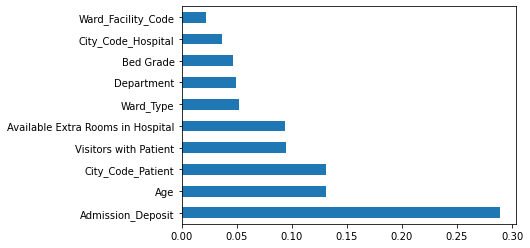

In [23]:
# Let's show a plot of ten (10) features
feature_importance = pd.Series(feature_imp.feature_importances_, index=X_train_final.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

### Create Model with Random Forest Classifier

In [24]:
# Create model
stay_predict = RandomForestClassifier()
stay_predict.fit(X_train_final, y_train)

RandomForestClassifier()

In [25]:
# Let's test the model
y_test = stay_predict.predict(X_test_final)
y_test

array([0, 4, 3, ..., 3, 3, 2], dtype=int64)

In [39]:
predection_df = pd.DataFrame()
predection_df['case_id'] = test_df['case_id'] # case_id would be needed for submission file
predection_df['Stay'] = y_test

decode_prediction = { 0 : '0-10', 1 : '0-10', 2 : '11-20', 3 : '21-30', 4 : '31-40', 5 : '41-50', 6 : '51-60', 7 : '61-70'
            ,8 : '71-80', 9 : '81-90', 10 : '91-100', 11 : 'More than 100 Days'}

predection_df['Stay'] = predection_df['Stay'].map(decode_prediction)

In [40]:
predection_df.head()

,case_id,Stay
0,318439,0-10
1,318440,31-40
2,318441,21-30
3,318442,41-50
4,318443,41-50


In [ ]:
stay_predict.score(X_train_final, y_train)

In [ ]:
score = cross_val_score(stay_predict, X_train_final, y_train.ravel(), cv=10)
score.mean()

##### Create a submission File

In [41]:
submission = predection_df.copy()
submission.head()

,case_id,Stay
0,318439,0-10
1,318440,31-40
2,318441,21-30
3,318442,41-50
4,318443,41-50


##### Thanks